In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [792]:
def Creep( leftSpeed, rightSpeed, robotWidth ):
    #Find the radius of the robot's arc#
    DeltaSpeedConstant = np.abs( leftSpeed - rightSpeed )
    SideConstant = ( -1 if leftSpeed > rightSpeed else 1 )
    GreaterSpeed = leftSpeed if leftSpeed > rightSpeed else rightSpeed
    ThetaConstant = np.arctan( DeltaSpeedConstant / robotWidth )
    MagnitudeConstant = np.sqrt( - ( GreaterSpeed ** 2 ) / ( ( np.cos( ThetaConstant ) ** 2 ) - 1 ) )
    RadiusConstant = np.cos( ThetaConstant ) * SideConstant * MagnitudeConstant
    ######################################################
    #Get the distance to the center of the robot, measure#
    #the arc length from there to approximate momentum. ##
    ######################################################
    #RadiusConstant - ( robotWidth / 2.0 )
    return ( RadiusConstant, ThetaConstant )

In [793]:
RadiusConstant, ThetaConstant = Creep( 1, 3, 1 )

In [794]:
def Drive( leftSpeed, rightSpeed, robotWidth, steps, DeltaTimeConstant, done = False, lastRadius = 0, oldAngle = 0, x = [], y = [] ):
    RadiusConstant, ThetaConstant = Creep( leftSpeed, rightSpeed, robotWidth )
    lastX = 0
    lastY = 0
    if len( x ) == 0:
        x = [ RadiusConstant ]
        y = [ 0 ]
    else:
        lastX = x[ len( x ) - 1 ]
        lastY = y[ len( y ) - 1 ]
    for i in range( steps ):
        theta = ( ThetaConstant * i * DeltaTimeConstant )# + oldAngle
        x.append( ( RadiusConstant ) * np.cos( theta ) + lastX )
        y.append( ( RadiusConstant ) * np.sin( theta ) + lastY )
    if done == True:
        return x, y
    return lambda leftSpeed_, rightSpeed_, steps_, done_ = False: Drive( leftSpeed_, rightSpeed_, robotWidth, steps_, 
              DeltaTimeConstant, done_, RadiusConstant, ThetaConstant * ( steps + 1 ) * DeltaTimeConstant + oldAngle, x, y )

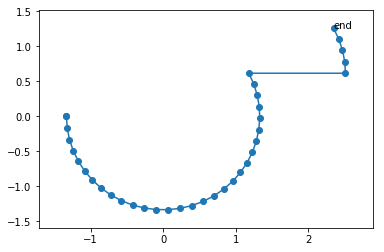

In [795]:
x, y = Drive( 4, 1, 1, 30, .1 )( 1, 4, 5, True )
plt.margins( .1 )
plt.plot( x, y, marker = 'o' )
plt.text( x[ -1 ], y[ -1 ], "end" )
plt.show()

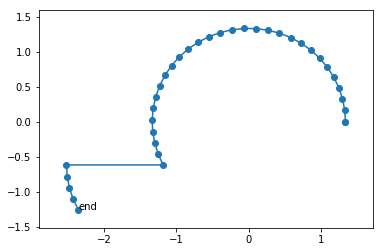

In [796]:
x, y = Drive( 1, 4, 1, 30, .1 )( 4, 1, 5, True )
plt.margins( .1 )
plt.plot( x, y, marker = 'o' )
plt.text( x[ -1 ], y[ -1 ], "end" )
plt.show()

In [797]:
###################################WORKING ON MEASURING THE BOX###################################################

In [1006]:
def SensorContact( pathX, pathY, element, boxY ):
    if pathY != 0:
        x = pathX[ element + 1 ] - pathX[ element ]
        y = pathY[ element + 1 ] - pathY[ element ]
        #y = m(x+c)+b
        #-b = ( -1 / m )( x + c ) = -x/m - c/m => ( b * m ) - c = x
        #-b + c/m = -x / m => bm - c = x
        
        #y = m(x+c)+b
        slope = y / x
        XInterceptConstant = -( ( slope * ( boxY - pathY[ element ] ) ) - pathX[ element ] )
        return XInterceptConstant, np.sqrt( ( ( XInterceptConstant - pathX[ element ] ) ** 2 ) + ( ( boxY - pathY[ element ] ) ** 2 ) )
    return np.float( 'nan' ), np.float( 'nan' )

In [1050]:
def PrintLine( x, y, where, OffsetConstant ):
    q = np.linspace( x[ where ] - OffsetConstant, x[where] + OffsetConstant )
    m = ( ( y[ where + 1 ] - y[ where ] ) / ( x[ where + 1 ] - x[ where ] ) )
    #plt.plot( q, ( ( q - x[ where ] ) * m ) + y[ where ] )
    plt.plot( q, ( ( ( q - x[ where ] ) * ( -1.0 / m ) ) + y[ where ] ) )

def Slope( x, y, where ):
    return ( ( y[ where + 1 ] - y[ where ] ) / ( x[ where + 1 ] - x[ where ] ) )

#Inverts slopes#
def Intersect( x, y, first, second, invertSlopes = True ):
    #m_0(x+c_0) + b_0 = m_1(x+c_1) + b_1 => (m_1-m_0)x+(m_1c_1-m_0c_0) + b_1-b_0 => (-(b_1-b_0)-(m_1c_1-m_0c_0))/(m_1-m_0) = x
    firstSlope = Slope( x, y, first )
    secondSlope = Slope( x, y, second )
    if invertSlopes == True:
        firstSlope = -1.0 / firstSlope
        secondSlope = -1.0 / secondSlope
    xIntercect = ( -( y[ second ] - y[ first ] ) - ( ( secondSlope * x[ second ] ) - ( firstSlope * x[ first ] ) ) ) / ( secondSlope - firstSlope )
    #m_0(x+c_0) + b_0 = y => ((y-b_0)/m_0)-c_0 = x
    #m_1(x+c_1) + b_1 = y => m_1((((y-b_0)/m_0)-c_0)+c_1) + b_1 = y => (m_0(-b_1 + m_1(c_0-c_1))+m_1b_0)/(m_1-m_0)
    #yIntercect = ( firstSlope * ( -y[ second ] + ( secondSlope * ( x[ first ] - x[ second ] ) ) ) + ( secondSlope * y[ first ] ) ) / ( secondSlope - firstSlope )
    
    yIntercect = ( (  -firstSlope * y[ second ] ) + \
                  ( ( firstSlope * secondSlope ) * ( x[ first ] - x[ second ] ) ) + \
                  ( secondSlope * y[ first ] ) ) / ( secondSlope - firstSlope ) 
    return xIntercect, yIntercect

2.8060703471227897 -1.0816562469007478 1.0879072635578437 1.22038628711498 3
2.630017041920671 -0.9761053493879036 0.8337033615699626 1.0917070270699565 3
2.5107698605990585 -0.8553458706203929 0.6319885292140175 0.9771797717142956 3
2.429523458545255 -0.7212593496618608 0.4628856669976883 0.8785889565805374 3
2.375725578363617 -0.5759349726339005 0.3145349962378893 0.7974707134231755 3
2.4331678060797173 0.3975567697895864 -0.4714712752547641 0.7273152815515351 3
2.5085712577403196 0.553010759121358 -0.6278737726792762 0.7867577001794748 3
2.613879580186403 0.6998483536448472 -0.8083238531517596 0.8651035026583371 3
2.760785447069868 0.8357816942791161 -1.0256568709705685 0.9611319923658692 3


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


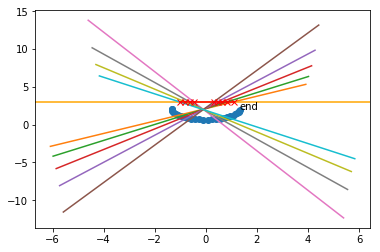

In [1051]:
x, y = Drive( 4, 1, 1, 26, .1, True )
OffsetConstant = 2
BoxPositionConstant = 3
for i in range( len( y ) ):
    y[ i ] += OffsetConstant
#plt.margins( .1 )
plt.plot( x, y, marker = 'o' )
plt.text( x[ -1 ], y[ -1 ], "end" )
plt.axhline( y = BoxPositionConstant, xmin = 0, xmax = 1.0, c='orange' )
lineXs = []
magnitudes = []

line = []
for i in range( len( x ) - 1 ):
    lineX, magnitude = SensorContact( x, y, i, BoxPositionConstant )
    #print( x[ i + 1 ], x[ i ], y[ i + 1 ], y[ i ], " 1/m ", ( x[ i + 1 ] - x[ i ] ) / ( y[ i + 1 ] - y[ i ] ) )
    if np.float( 'nan' ) != lineX and np.abs( lineX ) < 5 and i != 13 and ( ( i > 5 and i < 11 ) or ( i > 15 and i < 20 ) ):
        print( magnitude, x[i], lineX, y[i], BoxPositionConstant)
        lineXs.append( lineX )
        magnitudes.append( magnitude )
        line.append( ( x[ i ], lineX ) )
        line.append( ( y[ i ], OffsetConstant ) )
        line.append( 'green' )
        PrintLine( x, y, i, 5 )
plt.plot( np.array( lineXs ), [ BoxPositionConstant ] * len( lineXs ), marker = 'x', c = 'red' )
#plt.plot( *line )
l = 2

In [1052]:
def PythagFromPoint( xFrom, yFrom, xTo, yTo ):
    return np.sqrt( ( ( xTo - xFrom ) ** 2 ) + ( ( yTo - yFrom ) ** 2 ) )

In [1053]:
def DrawSegment( x, y, radius, index ):
    slope = Slope( x, y, index )
    plt.plot( x[index] + radius * slope, ( radius * slope ) + y[ index ], marker = 'x' )

In [1076]:
def RunMeasurementTest( leftSpeed, rightSpeed, steps, start, deltaTime, predictor, BoxDistanceConstant, OffsetConstant = 2, RobotWidthConstant = 1, plot = True ):
    x, y = Drive( leftSpeed, rightSpeed, RobotWidthConstant, steps, deltaTime, True )
    for i in range( start, len( y ) ):
        y[ i ] += OffsetConstant
    startX, startMagnitude = SensorContact( x, y, start, BoxDistanceConstant )
    endX, endMagnitude = SensorContact( x, y, -2, BoxDistanceConstant )
    testDistance = predictor( leftSpeed, rightSpeed, RobotWidthConstant, startMagnitude, endMagnitude, ( steps - ( 2 + start ) ), deltaTime )
    if plot == True:
        PrintLine( x, y, start, startMagnitude )
        PrintLine( x, y, -2, endMagnitude )
        xi, yi = Intersect( x, y, start, -2 )
        print( xi, yi )
        radius, theta = Creep( leftSpeed, rightSpeed, RobotWidthConstant )
        print( "Start mag ", startMagnitude, " end magnitude ", endMagnitude, " theta ", theta, " radius ", radius )
        #DrawSegment( x, y, radius, start )
        #DrawSegment( x, y, radius, -2 )
        #print( 'r ', radius, ' r0 ', PythagFromPoint( xi, yi, x[ start ], y[ start ] ), ' r1 ', PythagFromPoint( xi, yi, x[ -2 ], y[ -2 ] ) )
        #print( 'r ', radius, ' r0 ', PythagFromPoint( x[ start ], y[ start ], xi, yi ), ' r1 ', PythagFromPoint( x[ -2 ], y[ -2 ], xi, yi ) )
        plt.plot( x[ start : -1 ], y[ start : -1 ], marker = 'o', c = 'blue' )
        plt.text( x[ -2 ], y[ -2 ], "end" )
        plt.axhline( y = BoxDistanceConstant, xmin = 0, xmax = 1.0, c='orange' )
        plt.plot( [ startX, endX ], [ BoxDistanceConstant, BoxDistanceConstant ], marker = 'x', c = 'red' )
        plt.plot( xi, yi, marker = 'x' )
    return testDistance, ( np.abs( endX ) - np.abs( startX ) )


In [1077]:
def InteriorPredictor( leftSpeed, rightSpeed, RobotWidthConstant, startMagnitude, endMagnitude, steps, deltaTime ):
    radius, theta = Creep( leftSpeed, rightSpeed, RobotWidthConstant )
    radius = np.abs( radius )
    startSide = startMagnitude + radius
    endSide = endMagnitude + radius
    print( startMagnitude, startSide, endMagnitude, endSide, radius )
    return np.sqrt( ( startSide ** 2 ) + ( endSide ** 2 ) - ( 2 * endSide * startSide * np.cos( theta * ( steps - 1 ) * deltaTime ) ) )

15.202473113451893 16.535806446785227 13.455564728096885 14.788898061430219 1.3333333333333335
-14.529815569917552 -3.4372509079283815
Start mag  15.202473113451893  end magnitude  13.455564728096885  theta  1.2490457723982544  radius  -1.3333333333333335


(31.243930263084152, -4.713050899830083)

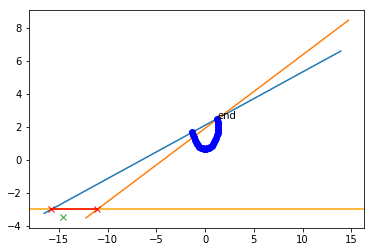

In [1079]:
RunMeasurementTest( 4, 1, 30, 3, .1, InteriorPredictor, -3 )

In [1057]:
1.1170308601462366*2

2.2340617202924733

In [1058]:
RunMeasurementTest( 4, 1, 15, 6, .1, DummyPredictor, -3 )

TypeError: DummyPredictor() takes 5 positional arguments but 7 were given